**In this notebook we are covering multi feature linear regression**

In [1]:
# let's start by importing set of libraries

import numpy as np
import matplotlib.pyplot as plt
import copy, math 

# setting display print precision on numpy arrays
np.set_printoptions(precision=2)

In [2]:
# create traiing data set for housing example with multiple input factors including house size, number of bedrooms, 
# number of floors and age of home influencing price

x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [3]:
# let's display the input data and array properties
print(f"House properties including size, floors, bedrooms and age is: {x_train}")
print(f"House properties array size is (m,n): {x_train.shape}")
print(f"Total number of House properties are: {x_train.size}")
print(f"Total number of House properties dimensions are: {x_train.ndim}")
print("\n")
print(f"House price based on given properties is: {y_train}")
print(f"House properties array size is (m,n): {y_train.shape}")
print(f"Total number of House prices are: {y_train.size}")
print(f"Total number of House prices dimensions are: {y_train.ndim}")

House properties including size, floors, bedrooms and age is: [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
House properties array size is (m,n): (3, 4)
Total number of House properties are: 12
Total number of House properties dimensions are: 2


House price based on given properties is: [460 232 178]
House properties array size is (m,n): (3,)
Total number of House prices are: 3
Total number of House prices dimensions are: 1


In [4]:
# now let's define w (weight) and b (bias) where w is vector and b is scalar

b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [5]:
# in out linear regression model we can calculate y predict value as f(w,b) = x0*w0 + x1*w1 + x2*w2 ... + b
# x0*w0 + x1*w1 + x2*w2 ... corresponds to the dot product of the x and w vectors = x.w

# define a predict function for single row of training data

def calc_pred_y(x, w, b):
 return np.dot(x, w) + b

In [6]:
# let's calculate the predicted value for y for the input training data

size = x_train.shape[0]
y_predict = np.empty(size)

for i in range(size):
    y_predict[i] = calc_pred_y(x_train[i], w_init, b_init)

print(y_predict)

[460. 232. 178.]


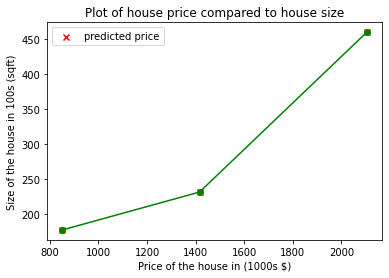

In [7]:
# Plot the predicted values based on multiple input features on graph

# plot the graph for predicted price compared to size of the house
# use slicing to pick first column of the 2d training data array
plt.plot(x_train[:,0], y_train, marker='o', color='g')
plt.scatter(x_train[:,0], y_predict, marker='x', color='r', label='predicted price')
plt.title('Plot of house price compared to house size')
plt.xlabel('Price of the house in (1000s $)')
plt.ylabel('Size of the house in 100s (sqft)')
plt.legend()
plt.show()

**Above graph is an example how price is not a direct correlation from one input parameter and is influenced by multiple input parameters**

In [8]:
# let's define a function to compute the cost function

def compute_cost(x, y, w, b):
    x_size = x.shape[0]
    dev_sum = 0
    for ind in range(x_size):
        dev_sum += np.square(calc_pred_y(x[ind],w,b) - y[ind])
    func_j_wb = dev_sum/(x_size*2)

    return func_j_wb

In [9]:
# let's calculate cost function for given data

cost_j_wb = compute_cost(x_train, y_train, w_init,b_init)

print(f"Cost function result for given training data at optimal value of w is: {cost_j_wb}")

Cost function result for given training data at optimal value of w is: 1.5578904428966628e-12


In [10]:
# now let's calculate the gradient descent for the given training data and set of weight parameters, considering b is constant and scalar

def compute_gradient(x, y, w, b):
    x_size_m, x_size_n = x.shape

    dj_dw = np.zeros(x_size_n)
    dj_db = 0
    for i in range(x_size_m):
        err = (calc_pred_y(x[i], w, b) - y[i])
        for j in range(x_size_n):
            dj_dw[j] = dj_dw[j] + err * (x[i,j])
        dj_db += err

    return dj_dw/x_size_m, dj_db/x_size_m

In [11]:
# Now let's compute and display the gradient

dj_dw, dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f" Gradient with respect to initial weight and weight of training data is: {dj_dw}")
print(f" Gradient with respect to initial weight and bias of training data is: {dj_db}")

 Gradient with respect to initial weight and weight of training data is: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
 Gradient with respect to initial weight and bias of training data is: -1.6739251501955248e-06


In [13]:
# now let's implement the gradient descent function

def gradient_descent(x, y, w_in, b_in, alpha, cost_function, gradient_function, num_iter):

    j_history = []
    
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iter):

        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            j_history.append(cost_function(x,y,w,b))

        if i% math.ceil(num_iter/10) == 0:
                 print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
        
    return w, b, j_history #return final w,b and J history for graphing

In [15]:
# now let's put our gradient descent to use 

initial_w = np.zeros_like(w_init)
initial_b = 0

iterations = 1000
alpha = 5.0e-7

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    alpha, compute_cost, compute_gradient, 
                                                    iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")



Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 


In [20]:
# now let's print the final predicted values based on new values for w and b

m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178
